# Tesla (TSLA) Stock Price prediction using Facebook Prophet

In [27]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [28]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [29]:
pip --version

pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [30]:
pip install pystan

In [31]:
pip install Prophet

In [32]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [33]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default="colab"

## Importing the Dataset & Exploring it

In [34]:
df= pd.read_csv('TSLA.csv')

In [35]:
df#read_csv function from pandas

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,93.900002,98.973999,88.433998,89.014000,89.014000,102447500
1,2020-03-17,88.001999,94.370003,79.199997,86.040001,86.040001,119973000
2,2020-03-18,77.800003,80.972000,70.101997,72.244003,72.244003,118931000
3,2020-03-19,74.940002,90.400002,71.692001,85.528000,85.528000,150977500
4,2020-03-20,87.639999,95.400002,85.157997,85.505997,85.505997,141427500
...,...,...,...,...,...,...,...
246,2021-03-08,600.549988,620.130005,558.789978,563.000000,563.000000,51787000
247,2021-03-09,608.179993,678.090027,595.210022,673.580017,673.580017,67523300
248,2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700
249,2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [37]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,414.739109,425.323268,402.764717,415.137952,415.137952,6.178552e+07
std,234.908560,239.374833,229.101662,234.987820,234.987820,3.306128e+07
min,74.940002,80.972000,70.101997,72.244003,72.244003,1.515770e+07
25%,194.901001,199.384003,188.566994,193.368995,193.368995,3.628290e+07
50%,408.951996,418.700012,401.660004,408.500000,408.500000,5.561600e+07
75%,606.549988,627.795013,586.750000,607.234985,607.234985,8.131825e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,2.221262e+08


In [38]:
df.shape

(251, 7)

# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [39]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [40]:
px.area(df,x="Date",y="Close")

In [41]:
px.area(df, x="Date", y="Volume")

In [42]:
px.bar(df,y="Volume")

In [43]:
px.box(df, y="Close")

# Understanding Facebook Prophet

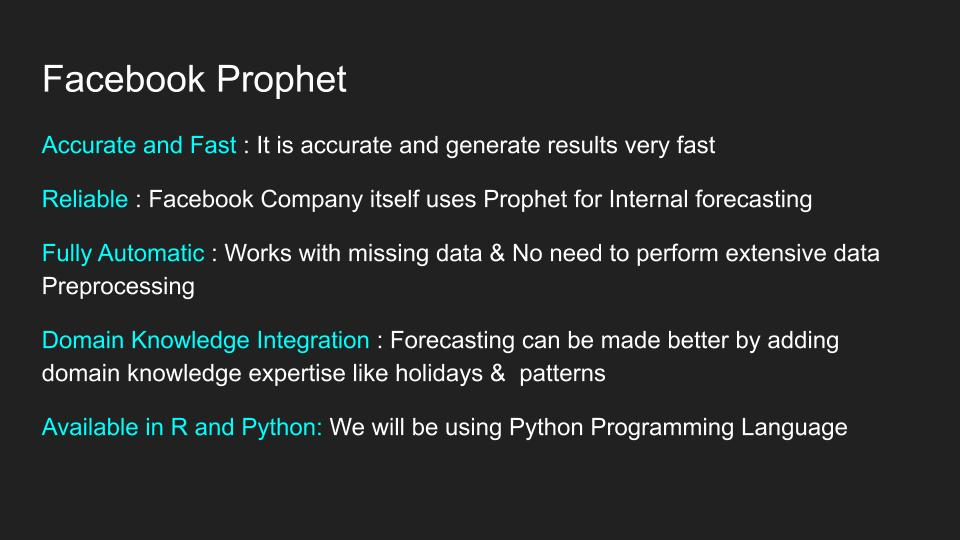

## Data Preperation

In [44]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,93.900002,98.973999,88.433998,89.014000,89.014000,102447500
1,2020-03-17,88.001999,94.370003,79.199997,86.040001,86.040001,119973000
2,2020-03-18,77.800003,80.972000,70.101997,72.244003,72.244003,118931000
3,2020-03-19,74.940002,90.400002,71.692001,85.528000,85.528000,150977500
4,2020-03-20,87.639999,95.400002,85.157997,85.505997,85.505997,141427500
...,...,...,...,...,...,...,...
246,2021-03-08,600.549988,620.130005,558.789978,563.000000,563.000000,51787000
247,2021-03-09,608.179993,678.090027,595.210022,673.580017,673.580017,67523300
248,2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700
249,2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900


In [45]:
columns=['Date',"Close"]
ndf=pd.DataFrame(df, columns=columns)
print(ndf)

           Date       Close
0    2020-03-16   89.014000
1    2020-03-17   86.040001
2    2020-03-18   72.244003
3    2020-03-19   85.528000
4    2020-03-20   85.505997
..          ...         ...
246  2021-03-08  563.000000
247  2021-03-09  673.580017
248  2021-03-10  668.059998
249  2021-03-11  699.599976
250  2021-03-12  693.729980

[251 rows x 2 columns]


In [46]:
prophet_df=ndf.rename(columns={"Date":'ds', "Close":'y'})
print(prophet_df)

             ds           y
0    2020-03-16   89.014000
1    2020-03-17   86.040001
2    2020-03-18   72.244003
3    2020-03-19   85.528000
4    2020-03-20   85.505997
..          ...         ...
246  2021-03-08  563.000000
247  2021-03-09  673.580017
248  2021-03-10  668.059998
249  2021-03-11  699.599976
250  2021-03-12  693.729980

[251 rows x 2 columns]


## Creating Facebook Prophet Model

In [47]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_ia7tbkf/qvszu0cx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_ia7tbkf/socghn3y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20590', 'data', 'file=/tmp/tmp_ia7tbkf/qvszu0cx.json', 'init=/tmp/tmp_ia7tbkf/socghn3y.json', 'output', 'file=/tmp/tmp_ia7tbkf/prophet_modele8qshirt/prophet_model-20240605050229.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:02:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:02:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [48]:
future= m.make_future_dataframe(periods=30)
forecast=m.predict(future)
print(forecast)

            ds       trend  yhat_lower   yhat_upper  trend_lower  trend_upper  \
0   2020-03-16   65.595927  -30.102441   147.012349    65.595927    65.595927   
1   2020-03-17   67.391416  -20.242499   153.008510    67.391416    67.391416   
2   2020-03-18   69.186904  -20.145554   154.131614    69.186904    69.186904   
3   2020-03-19   70.982392  -17.504458   150.508724    70.982392    70.982392   
4   2020-03-20   72.777881  -14.509634   149.846364    72.777881    72.777881   
..         ...         ...         ...          ...          ...          ...   
276 2021-04-07  900.284403  809.438930   980.282533   899.122289   901.231784   
277 2021-04-08  902.741475  813.795213   986.133468   901.506737   903.765700   
278 2021-04-09  905.198547  805.503682   979.216727   903.861515   906.275429   
279 2021-04-10  907.655619  829.548475  1003.288822   906.201629   908.798767   
280 2021-04-11  910.112690  833.464333  1011.985441   908.540308   911.339201   

     additive_terms  additi

In [49]:
px.line(forecast ,x="ds",y="yhat")

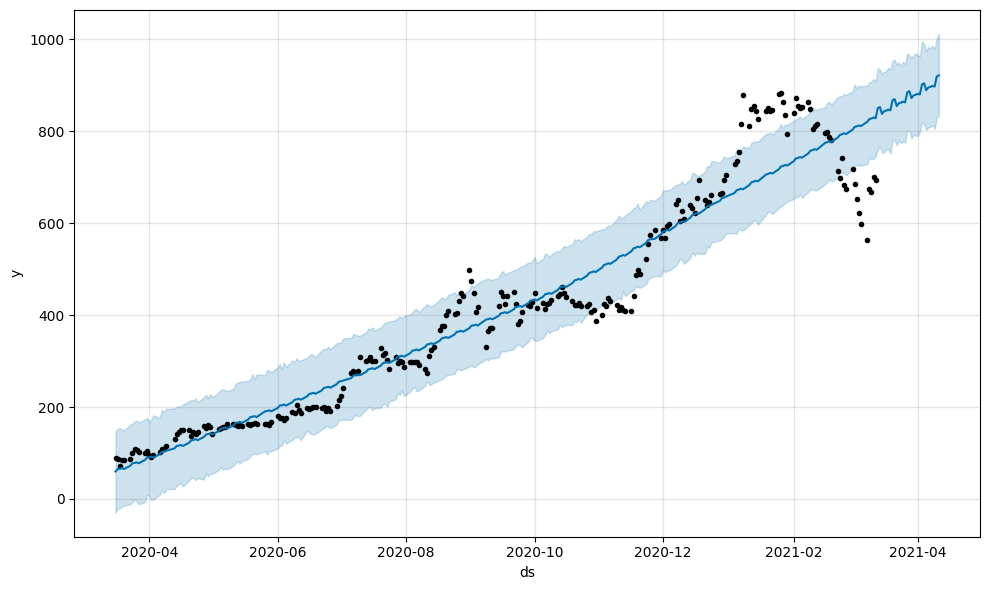

In [50]:
figure=m.plot(forecast,xlabel="ds",ylabel="y")

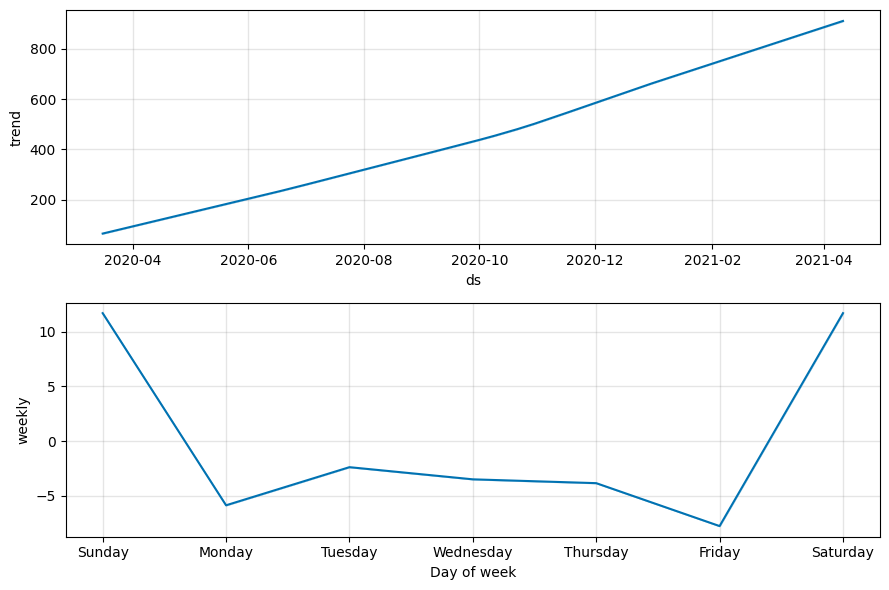

In [51]:
figure2=m.plot_components(forecast)

In [53]:
# Evaluating forecast performance
def evaluate_forecast(actual, forecast):
    # Trim forecast to align with actual data
    forecast = forecast.iloc[:len(actual)]
    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    rmse = np.sqrt(mse)
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)

# Visualizing forecast vs actual data
def plot_forecast_vs_actual(actual, forecast):
    fig = px.line(actual, x='ds', y='y', title='Forecast vs Actual')
    fig.add_scatter(x=forecast['ds'], y=forecast['yhat'][:len(actual)], mode='lines', name='Forecast')
    fig.show()

# Evaluating forecast performance
evaluate_forecast(prophet_df['y'], forecast['yhat'])


Mean Absolute Error (MAE): 47.16351848264579
Mean Squared Error (MSE): 4468.239301573003
Root Mean Squared Error (RMSE): 66.8448898688075


##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv("forecast.csv")
files.download("forecast.csv")